In [1]:
import datasets

glosslm_corpus = datasets.load_dataset("lecslab/glosslm-corpus")

In [2]:
glosses = [glossline.split() for glossline in glosslm_corpus['train']['glosses'] if glossline is not None]
glosses = [gloss for glossline in glosses for gloss in glossline]
glosses = [gloss for word_gloss in glosses for gloss in word_gloss.split("-")]
glosses = [gloss for word_gloss in glosses for gloss in word_gloss.split(".")]
glosses = [gloss for gloss in glosses if gloss.isupper()]
glosses

['GENACC',
 'GENACC',
 'LOC',
 '3SG',
 'GEN',
 'LOC',
 'GENACC',
 'CVB',
 '3SG',
 'PST',
 '3SG',
 'ACTESS',
 'GENACC',
 '3SG',
 'PROG',
 'PST',
 '1DU',
 'PST',
 'PTCP',
 'ADJ',
 'PL',
 'COND',
 '3PL',
 '1SG',
 'GENACC',
 'POT',
 '3SG',
 'PROG',
 'IMP',
 '3SG',
 'LOC',
 '3PL',
 'GENACC',
 '2SG',
 'PL',
 'GENACC',
 'LOC',
 '3SG',
 'ILL',
 'GENACC',
 '1SG',
 '1SG',
 'ILL',
 'INF',
 'GENACC',
 '3SG',
 'NOM)',
 '3SG',
 '1SG',
 'GEN',
 'NOM',
 'PST',
 '3SG',
 '3SG',
 'NEG',
 '3SG',
 'CNG',
 '1SG',
 '1SG',
 '1SG',
 'POSS',
 'INF',
 'PST',
 '3SG',
 'GENACC',
 'VABE',
 'GA',
 'GENACC',
 'AG',
 'PTCP',
 'PASS',
 '3PL',
 'PL',
 'GENACC',
 'PL',
 'PL',
 'PST',
 '3SG',
 'ADV',
 'PTCP',
 'PRF',
 'NEG',
 'IMP',
 '2SG',
 '1SG',
 'ACC',
 'CNG',
 'PL',
 'GENACC',
 'GENACC',
 'AN',
 'GA',
 'PL',
 '3PL',
 'PL',
 'COM',
 'SPRL',
 'COM',
 'COM',
 '1PL',
 'GENACC',
 'GEN',
 'ILL',
 'LOC',
 'COM',
 'COM',
 'ESS',
 '3SG',
 '1SG',
 'GENACC',
 'INE',
 'INE',
 'GEN',
 'PST',
 '1PL',
 'ILL',
 'GEN',
 'INF',
 'INE'

In [3]:
from collections import Counter
counts = Counter(glosses)
print(len(counts))
counts

11493


Counter({'PL': 52488,
         '3SG': 39147,
         'PAST': 36124,
         '3PL': 32253,
         'SG': 31638,
         'NOM': 29977,
         'NEG': 28876,
         'PST': 28849,
         'ACC': 28327,
         '1SG': 26405,
         'I': 22867,
         'PFV': 21481,
         'S': 20855,
         'FUT': 20456,
         'IC': 20450,
         'M': 19717,
         '1S': 19426,
         '3S': 18443,
         'IMPERF': 18267,
         'POSS': 18139,
         'GEN': 16729,
         'DAT': 16079,
         'DEM': 15585,
         'ERG': 15543,
         'CVB': 15249,
         'F': 14858,
         'DEF': 13814,
         'OBL': 13639,
         'PRS': 12580,
         'REDUP': 12418,
         'IPFV': 12217,
         'TOP': 11564,
         'PERF': 11362,
         '2SG': 11314,
         '0S': 11088,
         '1PL': 10676,
         'N': 9620,
         'INF': 9504,
         '2S': 8725,
         'LOC': 8566,
         'NARRPAST': 8436,
         'PART': 7975,
         'DETACH': 7736,
         'CL': 74

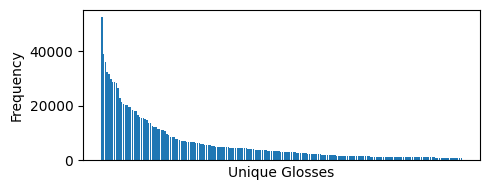

In [11]:
import matplotlib.pyplot as plt

# Separate keys and values
labels, values = zip(*counts.most_common(200))

# Create the bar chart
plt.figure(figsize=(5, 2))
plt.bar(labels, values)

plt.xlabel('Unique Glosses')
plt.xticks(ticks=[])
plt.ylabel('Frequency')
# plt.title('Gloss frequencies')
# plt.show()
plt.tight_layout()
plt.savefig('gloss_dist.pdf')

In [24]:
sum([v for k, v in counts.most_common(200)]) / sum(counts.values())

0.8276048027453279

In [25]:
counts.most_common(5)

[('PL', 52488), ('3SG', 39147), ('PAST', 36124), ('3PL', 32253), ('SG', 31638)]

In [27]:
import csv
with open("glosses.csv", mode="w", newline='') as f:
    writer = csv.writer(f)
    for g, v in counts.most_common(500):
        writer.writerow([g, v])


Time to actually normalize

,Original,UniMorph
0,PL,PL
1,3SG,3.SG
2,PAST,PST
3,3PL,3.PL
4,SG,SG
...,...,...
193,MID,MID
194,DOWN,DOWN
195,PAS,PASS
196,HITHER,HITHER


In [15]:
import pandas as pd
import re 
import datasets

mapping = pd.read_csv('../../mapping.csv')
mapping['Original'] = mapping['Original'].astype(str)
mapping['UniMorph'] = mapping['UniMorph'].astype(str)

glosslm_corpus = datasets.load_dataset("lecslab/glosslm-corpus-split")

def rewrite_glosses(row):
    # Iterate over the mapping DataFrame
    if row['glosses'] is not None:
        for index, mapping_row in mapping.iterrows():
            original = mapping_row['Original']
            unimorph = mapping_row['UniMorph']
            pattern = r'(?<!\w)' + re.escape(original) + r'(?!\w)'
            row['glosses'] = re.sub(pattern, unimorph, row['glosses'])
    return row

glosslm_corpus_mapped = glosslm_corpus.map(rewrite_glosses)

Map:   0%|          | 0/418718 [00:00<?, ? examples/s]

Map:   0%|          | 0/104928 [00:00<?, ? examples/s]

Map:   0%|          | 0/11138 [00:00<?, ? examples/s]

Map:   0%|          | 0/11940 [00:00<?, ? examples/s]

Map:   0%|          | 0/7356 [00:00<?, ? examples/s]

Map:   0%|          | 0/984 [00:00<?, ? examples/s]

Map:   0%|          | 0/972 [00:00<?, ? examples/s]

In [17]:
glosslm_corpus_mapped['train'].select(range(2))['glosses']

['this.GENACC good.GENACC car.LOC', 'box be.3.SG table.GEN under.LOC']

In [20]:
glosslm_corpus_mapped.push_to_hub("lecslab/glosslm-corpus-split-unimorph")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/419 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/105 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/12 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/12 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/lecslab/glosslm-corpus-split-unimorph/commit/e969c1126696d34fde350275ab6d2161678bd69d', commit_message='Upload dataset', commit_description='', oid='e969c1126696d34fde350275ab6d2161678bd69d', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
glosslm_corpus_mapped.push_to_hub("lecslab/glosslm-corpus-split-unimorph")